В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
water = pd.read_csv('water.csv', delimiter=',')
water.info()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [5]:
water.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


<Axes: xlabel='hardness', ylabel='mortality'>

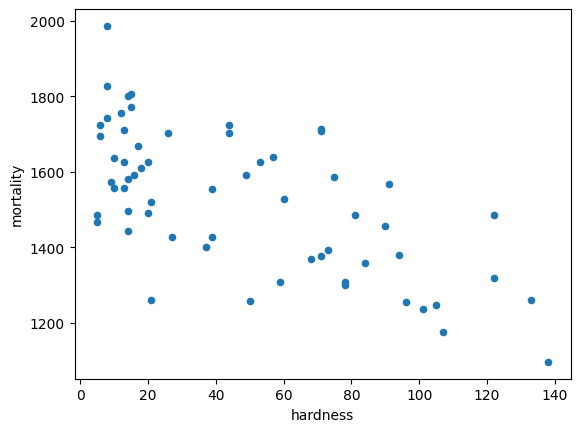

In [9]:
water.plot(kind='scatter', x='hardness', y='mortality')

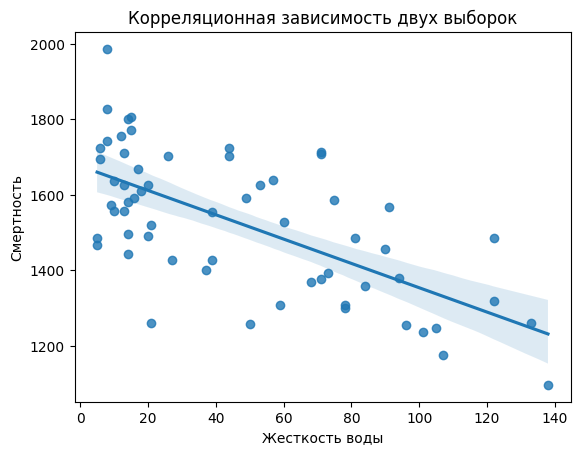

In [10]:
hardness = water['hardness']
mortality = water['mortality']
sns.regplot(x= hardness, y=mortality, data=water, fit_reg=True)
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
#plt.show()

In [11]:
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [12]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
hardness = np.array(hardness).reshape(-1,1)
mortality = np.array(mortality).reshape(-1,1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    hardness,
    mortality,
    test_size = 0.2
)

In [29]:
model = LinearRegression().fit(x_train, y_train)

In [36]:
y_pred = model.predict(x_test)

In [33]:
model.score(x_test, y_test)

0.4150236342045729

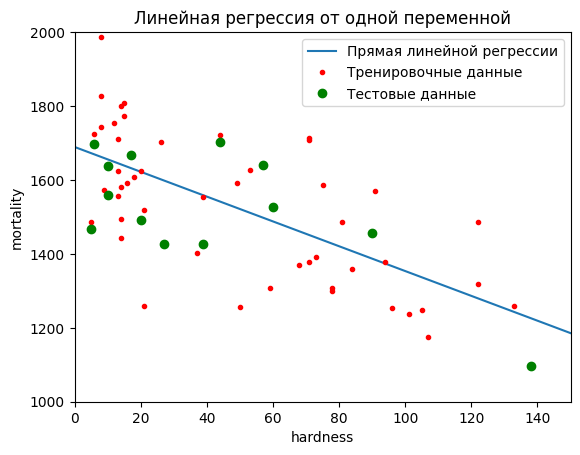

In [35]:
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(x_train, y_train, 'r.')
plt.plot(x_test, y_test, 'go')
plt.xlim(0,150)
plt.ylim(1000,2000)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4150236342045729

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

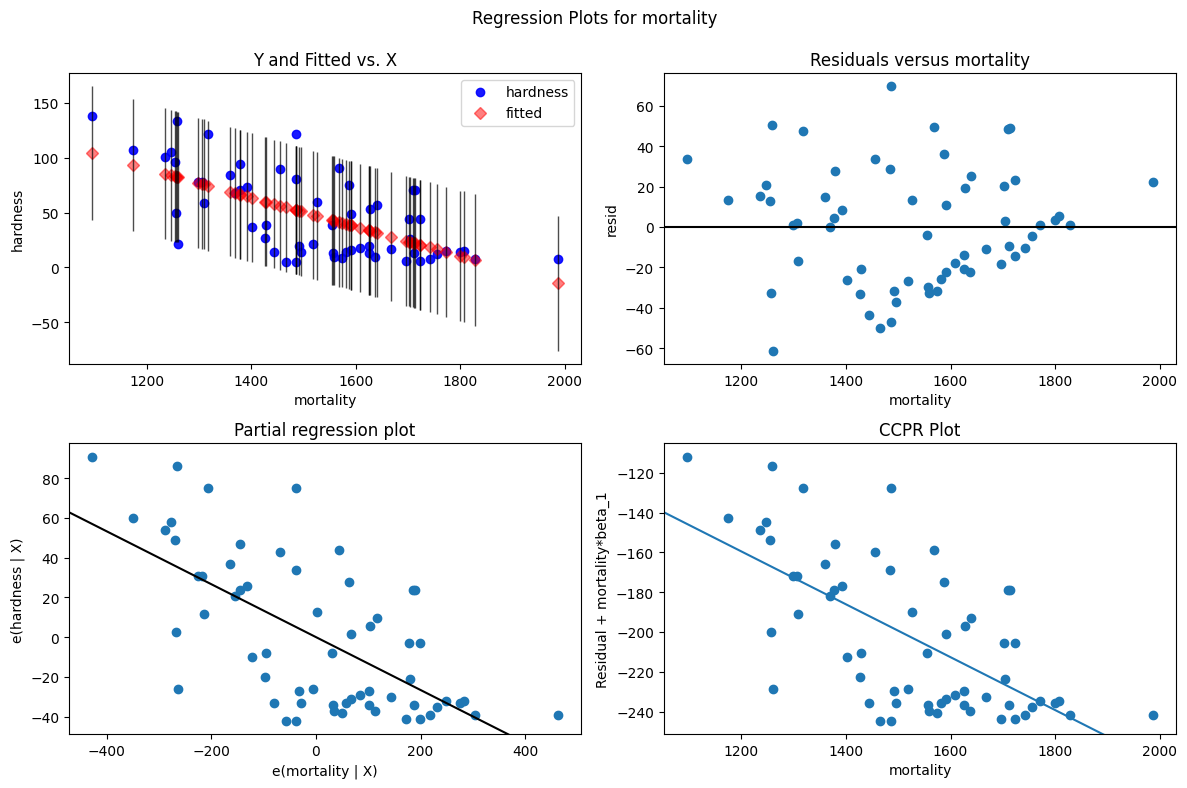

In [53]:
model = ols('hardness ~ mortality', data = water).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'mortality', fig=fig)